In [ ]:
import torch

In [ ]:
print("Torch version", torch.__version__)

Torch version 2.8.0+cu126


In [ ]:
print("Cuda",torch.cuda.is_available())

Cuda True


In [ ]:
# print("Device", torch.device())

In [ ]:
print("Device",torch.device("cuda" if torch.cuda.is_available() else "cpu"))

Device cuda


In [ ]:
import torch
a = torch.tensor([[1,2],[3,4]],dtype=torch.float32)
b = torch.ones((2,2))

In [ ]:
print("Tensor a",a)

Tensor a tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(b)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
print("a+b \n",a+b)

a+b 
 tensor([[2., 3.],
        [4., 5.]])


In [ ]:
print("a X b\n",a*b)

a X b
 tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print("Flattened:\n", a.view(-1))

Flattened:
 tensor([1., 2., 3., 4.])


In [ ]:
if torch.cuda.is_available():
  a = a.to("cuda")
  print("Moved to GPU:",a.device)

Moved to GPU: cuda:0


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**3 + 4*x**2 + 5
y.backward()
print("dy/dx at x=2:", x.grad)

dy/dx at x=2: tensor(28.)


In [ ]:
x = torch.tensor(5.0, requires_grad=True)

In [ ]:
x

tensor(5., requires_grad=True)

In [ ]:
print(x.grad)

None


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [ ]:
import torchvision
import torchvision.transforms as transforms

# Dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # try 1 epoch first
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.0901
Epoch 2, Loss: 0.0873
Epoch 3, Loss: 0.1474
Epoch 4, Loss: 0.0175
Epoch 5, Loss: 0.0071
Epoch 6, Loss: 0.0160
Epoch 7, Loss: 0.0284
Epoch 8, Loss: 0.0073
Epoch 9, Loss: 0.0139
Epoch 10, Loss: 0.0006


Learning simple neural network to understand.

📝 Exercise: Fit y = 2x + 1

data = [[0.0], [1.0], [2.0], [3.0], [4.0]]

👉 Build a neural net with 1 input, 1 hidden layer (with ReLU), and 1 output that learns this mapping.
Steps you should implement:

* Task
  * Define the network using nn.Module.

    * Input → Hidden (size 1 → 4 neurons)

    * Hidden → Output (size 4 → 1)

    * Use ReLU activation in the hidden layer.

  * Define a loss function (MSELoss) and an optimizer (SGD).

  * Train for, say, 100 epochs.

  * Print predictions before and after training to check learning.
* Expected outcome
  * Before training: predictions are random.
  * After training: predictions should be close to the line  y = 2x + 1


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,4)
    self.fc2 = nn.Linear(4,1)

  def forward(self,x):
    h = F.relu(self.fc1(x))
    y = self.fc2(h)
    return y

In [ ]:
data = torch.tensor( [[0.0], [1.0], [2.0], [3.0], [4.0]])
# t = torch.tensor([5.0]) # Correct target values for y = 2x + 1
target = torch.tensor([[1.0], [3.0], [5.0], [7.0], [9.0]])

In [ ]:
net = SimpleNet()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

In [ ]:
for epoch in range(101):
  optimizer.zero_grad()
  y = 2 * net(data) + 1
  loss = criterion(y,t)
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}: y={y.item():.4f}, loss={loss.item():.4f}")


RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

I have written wrong and improvised is below.

✨ So the mistake:

    You applied 2*net(data)+1 inside training, which double-applied the function.
    Instead, just let the network predict, and compare predictions to target.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the network
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        h = F.relu(self.fc1(x))
        y = self.fc2(h)
        return y

# Data: y = 2x + 1
data = torch.tensor([[0.0], [1.0], [2.0], [3.0], [4.0]])
target = torch.tensor([[1.0], [3.0], [5.0], [7.0], [9.0]])

# Model, loss, optimizer
net = SimpleNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Training loop
for epoch in range(101):
    optimizer.zero_grad()
    y = net(data)                   # forward pass
    loss = criterion(y, target)     # compute loss
    loss.backward()                 # backward pass
    optimizer.step()                # update weights

    if epoch % 10 == 0:  # print every 10 epochs
        print(f"Epoch {epoch}: preds={y.squeeze().detach().numpy()}, loss={loss.item():.4f}")


Epoch 0: preds=[-0.40846878 -0.35366654 -0.46227118 -0.5708758  -0.67948043], loss=38.8156
Epoch 10: preds=[1.6454921 3.4594994 5.115805  6.7721105 8.428415 ], loss=0.2040
Epoch 20: preds=[1.5495147 3.4634476 5.203232  6.943017  8.682802 ], loss=0.1324
Epoch 30: preds=[1.4445466 3.4062128 5.17996   6.9537067 8.727454 ], loss=0.0943
Epoch 40: preds=[1.3570006 3.3582199 5.160194  6.962168  8.764142 ], loss=0.0677
Epoch 50: preds=[1.2839051 3.3178852 5.1434107 6.9689355 8.79446  ], loss=0.0491
Epoch 60: preds=[1.2228554 3.2839236 5.1291537 6.9743843 8.819614 ], loss=0.0360
Epoch 70: preds=[1.1718781 3.2552874 5.1170416 6.9787955 8.840549 ], loss=0.0269
Epoch 80: preds=[1.1293359 3.2311091 5.1067467 6.9823837 8.85802  ], loss=0.0204
Epoch 90: preds=[1.0938623 3.2106676 5.097991  6.985314  8.872637 ], loss=0.0158
Epoch 100: preds=[1.0643128 3.19336   5.0905375 6.987715  8.884893 ], loss=0.0126


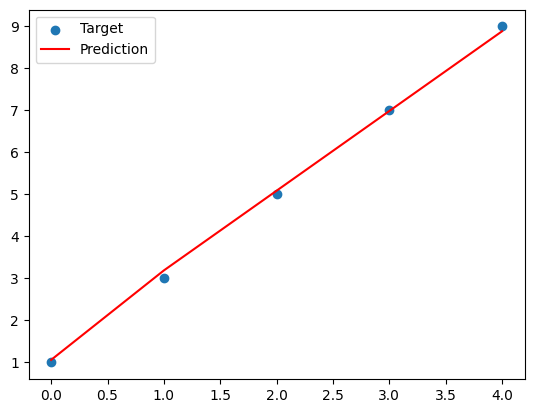

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    preds = net(data)
plt.scatter(data, target, label="Target")
plt.plot(data, preds, label="Prediction", color="red")
plt.legend()
plt.show()


print actual predictions vs. expected values (like a small table) after training, so you can verify the network really learned 2x+1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1. Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 4)   # input -> hidden
        self.fc2 = nn.Linear(4, 1)   # hidden -> output

    def forward(self, x):
        h = F.relu(self.fc1(x))  # hidden layer
        y = self.fc2(h)          # output
        return y

# 2. Training data (x and target y=2x+1)
data = torch.tensor([[0.0], [1.0], [2.0], [3.0], [4.0]])
target = torch.tensor([[1.0], [3.0], [5.0], [7.0], [9.0]])

# 3. Initialize model, loss, optimizer
net = SimpleNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# 4. Training loop
for epoch in range(201):
    optimizer.zero_grad()
    y_pred = net(data)
    loss = criterion(y_pred, target)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d}: Loss={loss.item():.4f}")

# 5. Show predictions vs. actual
print("\n=== Final Predictions ===")
with torch.no_grad():  # disable gradient tracking
    predictions = net(data)
    for i in range(len(data)):
        x_val = data[i].item()
        y_true = target[i].item()
        y_hat = predictions[i].item()
        print(f"x={x_val:.1f} | y_true={y_true:.1f} | y_pred={y_hat:.2f}")


Epoch   0: Loss=29.1934
Epoch  20: Loss=0.0298
Epoch  40: Loss=0.0169
Epoch  60: Loss=0.0110
Epoch  80: Loss=0.0081
Epoch 100: Loss=0.0067
Epoch 120: Loss=0.0059
Epoch 140: Loss=0.0054
Epoch 160: Loss=0.0050
Epoch 180: Loss=0.0047
Epoch 200: Loss=0.0044

=== Final Predictions ===
x=0.0 | y_true=1.0 | y_pred=0.93
x=1.0 | y_true=3.0 | y_pred=3.10
x=2.0 | y_true=5.0 | y_pred=5.05
x=3.0 | y_true=7.0 | y_pred=7.00
x=4.0 | y_true=9.0 | y_pred=8.95


Visual representation. Think of each **training step** as a 3-stage cycle:

---

## ⚙️ Training Step Flow

```
          ┌───────────────┐
          │   Step Start  │
          └───────┬───────┘
                  │
       ┌──────────▼──────────┐
       │ optimizer.zero_grad()│
       │ Clear old gradients  │
       └──────────┬──────────┘
                  │
       ┌──────────▼──────────┐
       │   loss.backward()   │
       │ Compute new gradients│
       │ (∂Loss/∂Weights)    │
       └──────────┬──────────┘
                  │
       ┌──────────▼──────────┐
       │   optimizer.step()   │
       │ Update parameters    │
       │ using gradients      │
       └──────────┬──────────┘
                  │
          ┌───────▼───────┐
          │   Step End    │
          └───────────────┘
```

---

## 🔎 Explanation of Each Stage

1. **`optimizer.zero_grad()`**

   * Resets `.grad` values for all model parameters.
   * Think of it as erasing the "scratchpad" before writing new gradients.

2. **`loss.backward()`**

   * PyTorch traverses the computational graph (Autograd) and computes derivatives of `loss` w\.r.t. each parameter.
   * Stores results in `param.grad`.

3. **`optimizer.step()`**

   * Uses the gradients in `param.grad` to update weights.
   * Example (SGD update rule):

     $$
     w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
     $$

     where $\eta$ = learning rate.

---

## 🔁 This repeats every epoch:

* Zero → Backpropagate → Update

That’s how the network **gradually learns** by reducing loss.

---





👉To **illustrate with numbers** (e.g., a single weight starting at 5.0 and moving towards the correct value step by step with zero\_grad/backward/step)?


Awesome 🚀 Let’s walk through a **tiny numerical example** to see how `zero_grad → backward → step` works in practice.

---

## 🎯 Setup

We want the network to learn:

$$
y = 2x
$$

Let’s start with:

* A single weight $w$, initialized as **5.0** (wrong).
* Learning rate $\eta = 0.1$.
* One training example: $x = 1, y_{true} = 2$.

---

## ⚙️ Training Iterations

### **Step 1: Forward pass**

$$
y_{pred} = w \cdot x = 5.0 \cdot 1 = 5.0
$$

Loss (MSE):

$$
L = (y_{pred} - y_{true})^2 = (5 - 2)^2 = 9
$$

---

### **Step 2: Backward pass (`loss.backward()`)**

Gradient:

$$
\frac{\partial L}{\partial w} = 2 \cdot (y_{pred} - y_{true}) \cdot x
= 2 \cdot (5 - 2) \cdot 1 = 6
$$

So `w.grad = 6`.

---

### **Step 3: Update weights (`optimizer.step()`)**

$$
w \leftarrow w - \eta \cdot w.grad
$$

$$
w = 5.0 - 0.1 \cdot 6 = 5.0 - 0.6 = 4.4
$$

✅ Weight moves closer to the correct value (2.0).

---

### **Step 4: Zero gradients (`optimizer.zero_grad()`)**

Now, `w.grad` is cleared (reset to 0), so the next iteration starts fresh.

---

## 🔁 Next Iteration (Step 2)

1. Forward:

$$
y_{pred} = 4.4 \cdot 1 = 4.4
$$

Loss = $(4.4 - 2)^2 = 5.76$.

2. Backward:

$$
\frac{\partial L}{\partial w} = 2 \cdot (4.4 - 2) \cdot 1 = 4.8
$$

So `w.grad = 4.8`.

3. Update:

$$
w = 4.4 - 0.1 \cdot 4.8 = 3.92
$$

✅ Weight gets closer to 2.0 again.

---

## 📉 What’s Happening

* Each iteration reduces loss.
* `zero_grad()` ensures we don’t **accumulate old gradients**.
* `backward()` computes fresh gradients.
* `step()` nudges weights toward the optimal value.

---



Epoch 0: Loss=86.2284
Epoch 20: Loss=0.5090
Epoch 40: Loss=0.3598
Epoch 60: Loss=0.2914
Epoch 80: Loss=0.2597
Epoch 100: Loss=0.2427
Epoch 120: Loss=0.2310
Epoch 140: Loss=0.2217
Epoch 160: Loss=0.2158
Epoch 180: Loss=0.2113
Epoch 200: Loss=0.2074


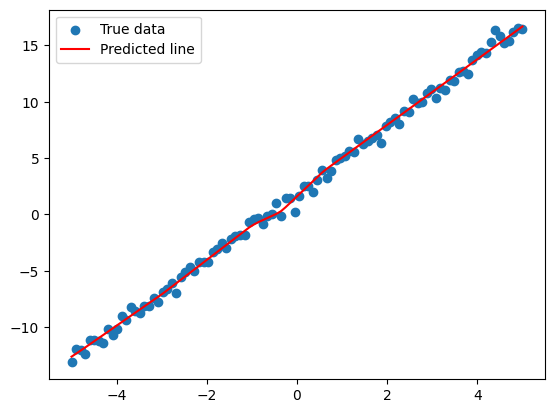

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Generate dataset
x = torch.linspace(-5, 5, 100).unsqueeze(1)  # shape (100,1)
y = 3 * x + 2 + 0.5*torch.randn(x.size())    # add noise

# 2. Define model (1 hidden layer)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)  # input -> hidden
        self.fc2 = nn.Linear(10, 1)  # hidden -> output

    def forward(self, x):
        h = F.relu(self.fc1(x))
        out = self.fc2(h)
        return out

net = Net()

# 3. Loss + optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# 4. Training loop
for epoch in range(201):
    optimizer.zero_grad()
    y_pred = net(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.4f}")

# 5. Plot predictions
with torch.no_grad():
    plt.scatter(x.numpy(), y.numpy(), label="True data")
    plt.plot(x.numpy(), net(x).numpy(), color="red", label="Predicted line")
    plt.legend()
    plt.show()


In [ ]:
with torch.no_grad():  # disable gradient tracking
    predictions = net(x)
    for i in range(len(x)):
        x_val = x[i].item()
        y_true = y[i].item()
        y_hat = predictions[i].item()
        print(f"x={x_val:.1f} | y_true={y_true:.1f} | y_pred={y_hat:.2f}")

x=-5.0 | y_true=-13.1 | y_pred=-12.63
x=-4.9 | y_true=-12.0 | y_pred=-12.36
x=-4.8 | y_true=-12.0 | y_pred=-12.09
x=-4.7 | y_true=-12.4 | y_pred=-11.82
x=-4.6 | y_true=-11.2 | y_pred=-11.53
x=-4.5 | y_true=-11.1 | y_pred=-11.25
x=-4.4 | y_true=-11.3 | y_pred=-10.97
x=-4.3 | y_true=-11.4 | y_pred=-10.69
x=-4.2 | y_true=-10.2 | y_pred=-10.41
x=-4.1 | y_true=-10.7 | y_pred=-10.13
x=-4.0 | y_true=-10.2 | y_pred=-9.85
x=-3.9 | y_true=-9.0 | y_pred=-9.57
x=-3.8 | y_true=-9.3 | y_pred=-9.29
x=-3.7 | y_true=-8.2 | y_pred=-9.01
x=-3.6 | y_true=-8.6 | y_pred=-8.72
x=-3.5 | y_true=-8.7 | y_pred=-8.44
x=-3.4 | y_true=-8.2 | y_pred=-8.16
x=-3.3 | y_true=-8.1 | y_pred=-7.88
x=-3.2 | y_true=-7.4 | y_pred=-7.60
x=-3.1 | y_true=-7.8 | y_pred=-7.32
x=-3.0 | y_true=-6.9 | y_pred=-7.04
x=-2.9 | y_true=-6.6 | y_pred=-6.73
x=-2.8 | y_true=-6.1 | y_pred=-6.42
x=-2.7 | y_true=-7.0 | y_pred=-6.11
x=-2.6 | y_true=-5.5 | y_pred=-5.80
x=-2.5 | y_true=-5.1 | y_pred=-5.49
x=-2.4 | y_true=-4.6 | y_pred=-5.18
x=-2.3 

🎯 Assignment 3: 2D Classification (Toy Dataset)

Instead of predicting numbers (regression), let’s train a neural network to classify points into two categories. This introduces you to:

  * Classification problems

  * CrossEntropy loss

  * Softmax outputs

🏗 Task

Create a 2D dataset with two classes (e.g., red vs. blue points).

  * Define a small neural network.

  * Train it using CrossEntropyLoss.

  * Print classification accuracy.

  * Plot decision boundary.





In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
# 1. Generate toy dataset
x, y = make_moons(n_samples=200, noise = 0.2, random_state=42)
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [ ]:
# 2. Define Model
class Classifier(nn.Module):
  def __init__(self):
      super().__init__()
      self.fc1 = nn.Linear(2, 16)
      self.fc2 = nn.Linear(16,2)

  def forward(self,x):
    h = F.relu(self.fc1(x))
    y = self.fc2(h)  # no softmax here (CrossEntropyLoss handles it)
    return y

In [ ]:
net = Classifier()

In [ ]:
# 3. Loss + optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [ ]:
# 4. Training Loop
for epoch in range(201):
    optimizer.zero_grad()
    y_logits = net(x)          # raw class scores
    loss = criterion(y_logits, y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        pred = torch.argmax(y_logits, dim=1)
        acc = (pred == y).float().mean()
        print(f"Epoch {epoch}: Loss={loss.item():.4f}, Accuracy={acc:.4f}")

Epoch 0: Loss=0.6850, Accuracy=0.5000
Epoch 20: Loss=0.4172, Accuracy=0.8350
Epoch 40: Loss=0.3603, Accuracy=0.8350
Epoch 60: Loss=0.3395, Accuracy=0.8350
Epoch 80: Loss=0.3285, Accuracy=0.8550
Epoch 100: Loss=0.3214, Accuracy=0.8550
Epoch 120: Loss=0.3162, Accuracy=0.8500
Epoch 140: Loss=0.3121, Accuracy=0.8500
Epoch 160: Loss=0.3090, Accuracy=0.8450
Epoch 180: Loss=0.3065, Accuracy=0.8450
Epoch 200: Loss=0.3043, Accuracy=0.8400


In [ ]:
# 5. Plot decision boundary
with torch.no_grad():
    xx, yy = torch.meshgrid(
        torch.linspace(-2, 3, 100),
        torch.linspace(-1.5, 2, 100),
        indexing="ij"
    )
    grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
    preds = net(grid)
    preds = torch.argmax(preds, dim=1).reshape(xx.shape)

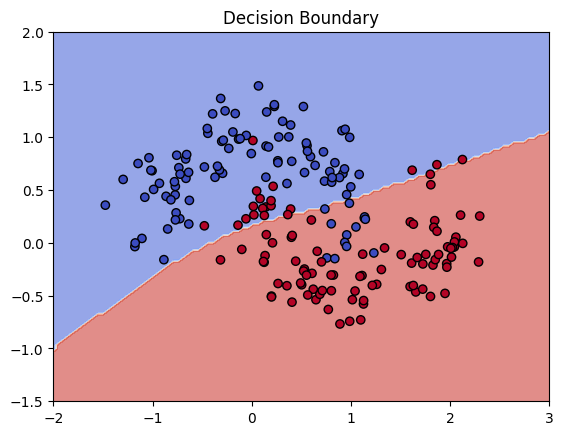

In [ ]:
plt.contourf(xx, yy, preds, cmap="coolwarm", alpha=0.6)
plt.scatter(x[:,0], x[:,1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("Decision Boundary")
plt.show()

👍 — this is the **right time** to talk about **logits** and **argmax**, because once you move from simple regression (like $y = 2x + 1$) to **classification** tasks (like MNIST digits), these concepts become central.

---

## 🔹 1. What are **logits**?

* In deep learning, especially classification tasks, the **last layer** of the network usually outputs **raw scores** (before applying a probability function).
* These raw scores are called **logits**.

👉 Example:
Suppose you want to classify an image into 3 classes: **cat, dog, horse**.
Your network might output something like:

$$
\text{logits} = [2.1, -1.3, 0.7]
$$

* These numbers are **not probabilities**.
* They can be positive or negative, and they don’t sum to 1.

Why raw scores?

* Because they are easier for the model to learn and optimize (no restriction like "sum must be 1").
* Later, we’ll convert them into probabilities using **softmax**.

---

## 🔹 2. Softmax (turn logits → probabilities)

$$
p_i = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

For the logits `[2.1, -1.3, 0.7]`:

$$
\text{softmax} = [0.62, 0.05, 0.33]
$$

* Now you can say:

  * Cat: 62% chance
  * Dog: 5% chance
  * Horse: 33% chance

---

## 🔹 3. What is **argmax**?

* Once you have logits (or probabilities), you want to **choose the predicted class**.
* `argmax` gives the **index of the largest value**.

👉 Example:

$$
\text{logits} = [2.1, -1.3, 0.7] \quad \Rightarrow \quad \text{argmax} = 0
$$

That means **class 0** (cat) is the predicted label.

---

## 🔹 4. Why do we use logits + argmax in PyTorch?

* **Training phase**:

  * We usually pass logits directly to loss functions like `nn.CrossEntropyLoss`, which internally applies **softmax + log-likelihood** in a numerically stable way.
* **Inference phase (prediction)**:

  * We take logits, apply `argmax` to get the predicted class.
  * We don’t *always* need softmax, since argmax(logits) = argmax(softmax(logits)).

---

## 🔹 5. Quick PyTorch example

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

# Suppose 3 classes
logits = torch.tensor([[2.1, -1.3, 0.7]])

# Softmax → probabilities
probs = F.softmax(logits, dim=1)
print("Probabilities:", probs)

# Argmax → predicted class
pred = torch.argmax(logits, dim=1)
print("Predicted class:", pred.item())
```

🔹 Output:

```
Probabilities: tensor([[0.62, 0.05, 0.33]])
Predicted class: 0
```

---

✅ **Summary**:

* **Logits** = raw model outputs (before softmax).
* **Softmax** = converts logits into probabilities.
* **Argmax** = picks the class with highest score/probability.
* During **training**, we use logits with `CrossEntropyLoss`.
* During **testing/inference**, we use `argmax` to decide the final class.

---

Would you like me to now give you a **mini assignment** where you’ll build a 3-class classifier (tiny neural net) on toy data and see how logits, softmax, and argmax come into play? That will make this 100% concrete before we scale up to MNIST.


Great question 👍 — **`optimizer.step()`** is one of the most important steps in training a neural network. Let’s break it down carefully.

---

## ⚙️ What happens in `optimizer.step()`?

When you call:

```python
optimizer.step()
```

PyTorch goes through **all the parameters (weights & biases)** in your model and **updates them using their gradients** that were computed during `loss.backward()`.

---

## 🔎 Example with SGD Optimizer

If you are using **Stochastic Gradient Descent (SGD)**:

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
```

the update rule for each parameter $w$ is:

$$
w \; \leftarrow \; w \; - \; \eta \cdot \frac{\partial L}{\partial w}
$$

* $w$ → current weight
* $\eta$ → learning rate (e.g., 0.1)
* $\frac{\partial L}{\partial w}$ → gradient of loss w\.r.t. the weight

So **optimizer.step() applies this update to every weight in the network**.

---

## 🧮 Mini Example by Hand

Imagine:

* Current weight = $w = 5.0$
* Gradient from `loss.backward()` = $\frac{\partial L}{\partial w} = 0.4$
* Learning rate = $\eta = 0.1$

Update:

$$
w \; \leftarrow \; 5.0 - 0.1 \times 0.4 = 5.0 - 0.04 = 4.96
$$

So after `optimizer.step()`, the weight is **4.96**.

---

## 🛠️ With Different Optimizers

* **SGD with momentum** → also considers past gradients.
* **Adam** → adaptively adjusts learning rate per parameter (uses moving averages of gradients & squared gradients).
* **RMSprop, Adagrad** → scale updates differently.

But in all cases, **`optimizer.step()` = “Update parameters using gradients”**.

---

## 🔁 Training Cycle Recap

1. `optimizer.zero_grad()` → Clear old gradients
2. `loss.backward()` → Compute new gradients
3. `optimizer.step()` → Update weights with new gradients

---

👉 Do you want me to show you **numerical updates with PyTorch** (e.g., printing the weight before and after `optimizer.step()` to see the change in action)?


🚀 Let’s do a tiny PyTorch experiment to see optimizer.step() actually updating weights.

In [ ]:
import torch

# Start with one weight (requires gradient for autograd)
w = torch.tensor([5.0], requires_grad=True)

# Optimizer (SGD with learning rate 0.1)
optimizer = torch.optim.SGD([w], lr=0.1)

# Fake loss = (w - 3)^2 → minimum when w=3
for step in range(5):
    optimizer.zero_grad()         # 1. clear old gradients

    loss = (w - 3)**2             # 2. define loss
    loss.backward()               # 3. compute gradient (dL/dw)

    print(f"Step {step}: w={w.item():.4f}, grad={w.grad.item():.4f}, loss={loss.item():.4f}")

    optimizer.step()              # 4. update weight


Step 0: w=5.0000, grad=4.0000, loss=4.0000
Step 1: w=4.6000, grad=3.2000, loss=2.5600
Step 2: w=4.2800, grad=2.5600, loss=1.6384
Step 3: w=4.0240, grad=2.0480, loss=1.0486
Step 4: w=3.8192, grad=1.6384, loss=0.6711


Perfect 🚀 Let’s do a **tiny PyTorch experiment** to see `optimizer.step()` actually updating weights.

---

## 🧪 Minimal Example: One Weight

```python
import torch

# Start with one weight (requires gradient for autograd)
w = torch.tensor([5.0], requires_grad=True)

# Optimizer (SGD with learning rate 0.1)
optimizer = torch.optim.SGD([w], lr=0.1)

# Fake loss = (w - 3)^2 → minimum when w=3
for step in range(5):
    optimizer.zero_grad()         # 1. clear old gradients
    
    loss = (w - 3)**2             # 2. define loss
    loss.backward()               # 3. compute gradient (dL/dw)
    
    print(f"Step {step}: w={w.item():.4f}, grad={w.grad.item():.4f}, loss={loss.item():.4f}")
    
    optimizer.step()              # 4. update weight
```

---

## 🔎 Expected Output Walkthrough

1. **Start**: $w = 5.0$

   * Loss = $(5-3)^2 = 4$
   * Gradient = $2(w-3) = 4$
   * Update → $w = 5 - 0.1 \times 4 = 4.6$

2. **Next step**: $w = 4.6$

   * Loss = $(4.6-3)^2 = 2.56$
   * Gradient = 3.2
   * Update → $w = 4.6 - 0.1 \times 3.2 = 4.28$

3. Repeat → weight keeps moving towards 3.0 (the optimum).

---

## 🌟 Key Takeaways

* `optimizer.step()` actually **moves the weight** using the gradient.
* You can literally watch the number **shrink towards the minimum** step by step.
* Without `optimizer.step()`, weights would **never change**, so the network wouldn’t learn.

---

👉 Do you want me to extend this same experiment to **two weights + bias** (like a mini linear regression) so you see how multiple parameters get updated together?


In [ ]:
import torch

# Dataset: 4 samples with 2 features each
X = torch.tensor([
    [0.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0]
], dtype=torch.float32)

# Target values
y_true = torch.tensor([1.0, 3.0, 4.0, 6.0], dtype=torch.float32).unsqueeze(1)

# Initialize weights and bias
w = torch.randn(2, 1, requires_grad=True)  # 2 weights
b = torch.randn(1, requires_grad=True)     # bias

# Optimizer
optimizer = torch.optim.SGD([w, b], lr=0.1)

# Training loop
for step in range(10):
    optimizer.zero_grad()               # Clear old gradients

    y_pred = X @ w + b                  # Linear model: y = Xw + b
    loss = ((y_pred - y_true)**2).mean()  # MSE Loss

    loss.backward()                     # Compute gradients
    optimizer.step()                     # Update weights & bias

    print(f"Step {step}: w={w.squeeze().tolist()}, b={b.item():.4f}, loss={loss.item():.4f}")


Step 0: w=[0.5675910115242004, -1.7926690578460693], b=0.7537, loss=34.5322
Step 1: w=[0.9750955700874329, -1.2171515226364136], b=1.4255, loss=17.5372
Step 2: w=[1.2458969354629517, -0.7867377400398254], b=1.8646, loss=9.5292
Step 3: w=[1.4241862297058105, -0.4568166732788086], b=2.1457, loss=5.7034
Step 4: w=[1.5400336980819702, -0.1969190090894699], b=2.3199, loss=3.8282
Step 5: w=[1.6138901710510254, 0.013785130344331264], b=2.4216, loss=2.8666
Step 6: w=[1.659654140472412, 0.1895543932914734], b=2.4745, loss=2.3366
Step 7: w=[1.6867616176605225, 0.3401668071746826], b=2.4947, loss=2.0138
Step 8: w=[1.70160973072052, 0.47234460711479187], b=2.4930, loss=1.7933
Step 9: w=[1.708526849746704, 0.5907250046730042], b=2.4770, loss=1.6259


✅ Key Takeaways

optimizer.step() works on all parameters passed to it, not just one.

Each parameter moves according to its own gradient.

This is exactly how PyTorch updates millions of parameters in deep neural networks like MNIST classifiers.

📝 Assignment: 3-Class Classifier on Toy Data
🔹 1. Dataset (manually create)

We’ll create some fake 2D points belonging to 3 classes:

Class 0 → near (0,0)

Class 1 → near (5,5)

Class 2 → near (0,5)

In [ ]:
import torch

# Toy dataset (x,y coordinates)
X = torch.tensor([
    [0.1, 0.2],   # class 0
    [0.2, -0.1],
    [5.1, 4.9],   # class 1
    [4.9, 5.2],
    [0.2, 5.1],   # class 2
    [-0.1, 4.8]
], dtype=torch.float32)

# Labels (ground truth class)
y = torch.tensor([0, 0, 1, 1, 2, 2])


🔹 2. Define a simple neural net

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)   # input=2 features → hidden=4
        self.fc2 = nn.Linear(4, 3)   # hidden=4 → output=3 classes

    def forward(self, x):
        h = F.relu(self.fc1(x))
        logits = self.fc2(h)  # raw scores (logits)
        return logits


🔹 3. Training

In [ ]:
model = SimpleClassifier()
criterion = nn.CrossEntropyLoss()  # expects logits + class labels
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(50):
    optimizer.zero_grad()
    logits = model(X)         # raw outputs
    loss = criterion(logits, y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}")


Epoch 0: loss=1.1234
Epoch 10: loss=0.8923
Epoch 20: loss=0.7699
Epoch 30: loss=0.7005
Epoch 40: loss=0.6546


🔹 4. Testing predictions

Now let’s see logits, probabilities, and argmax:

In [ ]:
with torch.no_grad():
    logits = model(X)
    probs = F.softmax(logits, dim=1)   # convert to probabilities
    preds = torch.argmax(probs, dim=1) # predicted class

    print("Logits:\n", logits)
    print("Probabilities:\n", probs)
    print("Predicted classes:\n", preds)
    print("True labels:\n", y)


Logits:
 tensor([[ 0.0718,  0.0441, -0.5735],
        [ 0.1135,  0.0987, -0.6452],
        [ 0.1135,  0.0987, -0.6452],
        [ 0.1135,  0.0987, -0.6452],
        [-1.5046, -2.0187,  2.1351],
        [-1.5132, -2.0299,  2.1499]])
Probabilities:
 tensor([[0.4004, 0.3895, 0.2100],
        [0.4076, 0.4016, 0.1909],
        [0.4076, 0.4016, 0.1909],
        [0.4076, 0.4016, 0.1909],
        [0.0252, 0.0151, 0.9597],
        [0.0246, 0.0147, 0.9607]])
Predicted classes:
 tensor([0, 0, 0, 0, 2, 2])
True labels:
 tensor([0, 0, 1, 1, 2, 2])


Let’s start building an MNIST classifier step by step, keeping it simple but clear.


🧠 Step 1: Load MNIST Dataset

We’ll use PyTorch’s torchvision to load MNIST (handwritten digits 0–9).



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Transform: convert images to tensors & normalize to [-1,1]

`ToTensor` and `Normalize` in PyTorch:

---

## 📘 PyTorch Image Transform Notes

### 🔹 `transforms.ToTensor()`

* Converts **PIL image / NumPy array** → PyTorch Tensor.
* Scales pixel values from **\[0, 255] → \[0, 1]** (float32).
* Example:

  ```
  128 → 128/255 ≈ 0.5
  ```

---

### 🔹 `transforms.Normalize(mean, std)`

* Formula:

  $$
  x' = \frac{x - \mu}{\sigma}
  $$
* Shifts and scales tensor values.
* Common for grayscale MNIST:

  ```python
  transforms.Normalize((0.5,), (0.5,))
  ```

  * Moves \[0,1] → \[-1,1].

---

### 🔹 Why Normalize?

1. **Centers data around 0** → faster convergence.
2. **Prevents exploding/vanishing gradients**.
3. Matches activation ranges (tanh \~ \[-1,1], ReLU >0).
4. Standardizes input → stable training.

---

⚡ Rule of Thumb:

* Use `ToTensor()` first (scales \[0–255] → \[0–1]).
* Then `Normalize(mean, std)` (standardizes to balanced range).

---

Here’s your **visual cheat sheet** 🎯

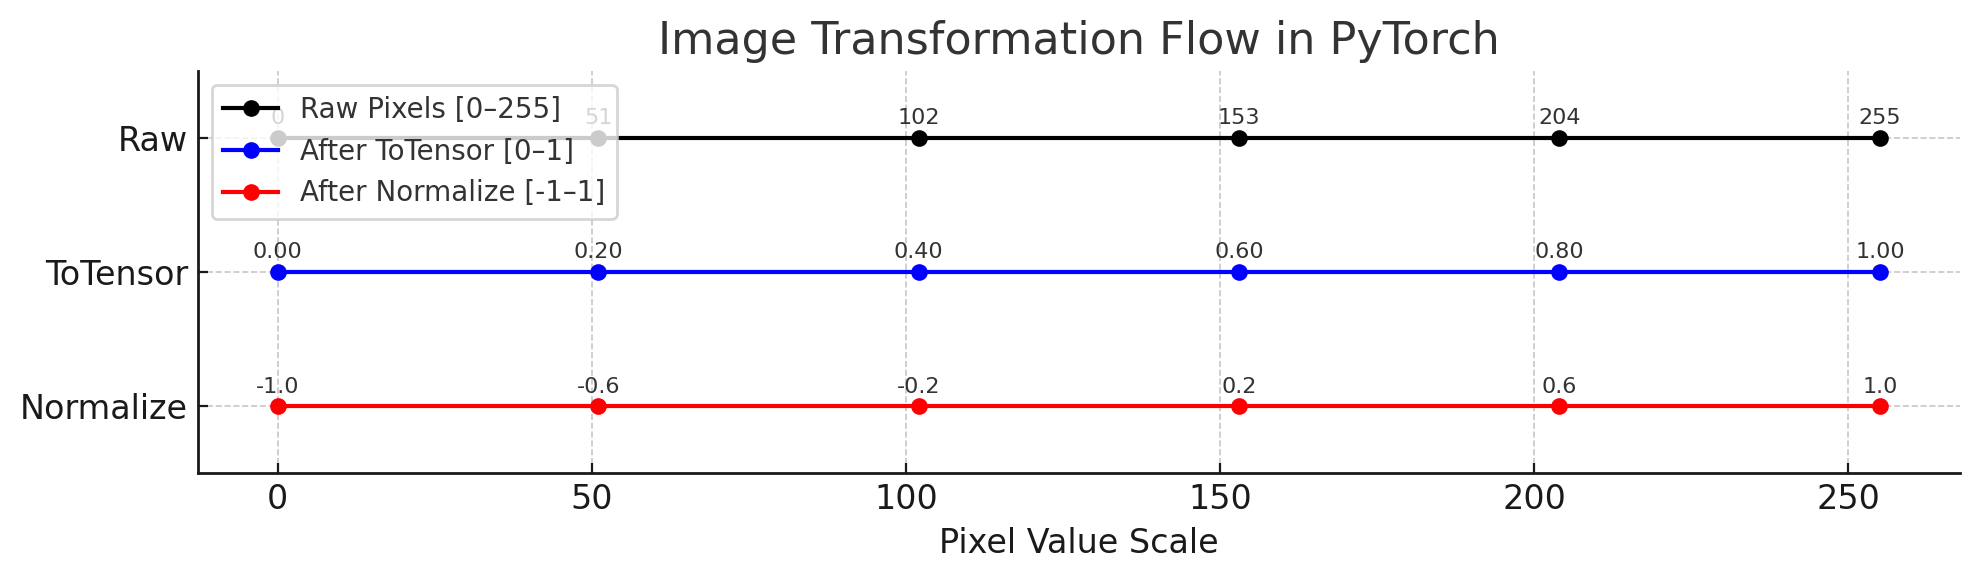

* **Black row** → Raw image pixels \[0–255]
* **Blue row** → After `ToTensor()` → \[0–1]
* **Red row** → After `Normalize((0.5,),(0.5,))` → \[-1–1]

This pipeline shows exactly how an MNIST image is prepared before entering a neural network.

Do you want me to also create a **ready-to-save PDF cheat sheet** (with this diagram + crisp notes) so you can keep it handy while practicing?



In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Download and load training/test data

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.74MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.99MB/s]


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

🧠 Step 2: Define a Simple Network

We’ll start big:

Input: 28×28 = 784 pixels

Hidden layers: 256 → 128

Output: 10 (digits 0–9)

In [ ]:
class MnsitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        logits = self.fc3(x)
        return logits

🧠 Step 3: Training Loop

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MnsitNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(10):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      print(f"Epoch {epoch}, Batch {batch_idx}: loss={loss.item():.4f}")

Epoch 0, Batch 0: loss=2.3100
Epoch 0, Batch 100: loss=2.0289
Epoch 0, Batch 200: loss=1.3464
Epoch 0, Batch 300: loss=0.9161
Epoch 0, Batch 400: loss=0.6929
Epoch 0, Batch 500: loss=0.6093
Epoch 0, Batch 600: loss=0.5090
Epoch 0, Batch 700: loss=0.6186
Epoch 0, Batch 800: loss=0.5269
Epoch 0, Batch 900: loss=0.4249
Epoch 1, Batch 0: loss=0.4046
Epoch 1, Batch 100: loss=0.2448
Epoch 1, Batch 200: loss=0.4302
Epoch 1, Batch 300: loss=0.2411
Epoch 1, Batch 400: loss=0.3239
Epoch 1, Batch 500: loss=0.3045
Epoch 1, Batch 600: loss=0.4854
Epoch 1, Batch 700: loss=0.4340
Epoch 1, Batch 800: loss=0.4130
Epoch 1, Batch 900: loss=0.3503
Epoch 2, Batch 0: loss=0.1470
Epoch 2, Batch 100: loss=0.2888
Epoch 2, Batch 200: loss=0.2309
Epoch 2, Batch 300: loss=0.3009
Epoch 2, Batch 400: loss=0.3158
Epoch 2, Batch 500: loss=0.4084
Epoch 2, Batch 600: loss=0.2205
Epoch 2, Batch 700: loss=0.5609
Epoch 2, Batch 800: loss=0.4065
Epoch 2, Batch 900: loss=0.3947
Epoch 3, Batch 0: loss=0.3504
Epoch 3, Batch 1

🧠 Step 4: Testing

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        logits = model(data)
        preds = torch.argmax(logits, dim=1)
        total += target.size(0)
        correct += (preds == target).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")
test(model, test_loader)

Accuracy: 95.12%


In [ ]:
sum(p.numel() for p in model.parameters())

235146

Shrink model

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
model = SmallNet()

sum(p.numel() for p in model.parameters())

109386

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(10):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      print(f"Epoch {epoch}, Batch {batch_idx}: loss={loss.item():.4f}")

Epoch 0, Batch 0: loss=2.3337
Epoch 0, Batch 100: loss=2.1522
Epoch 0, Batch 200: loss=1.8180
Epoch 0, Batch 300: loss=1.1566
Epoch 0, Batch 400: loss=0.7812
Epoch 0, Batch 500: loss=0.7019
Epoch 0, Batch 600: loss=0.8394
Epoch 0, Batch 700: loss=0.5050
Epoch 0, Batch 800: loss=0.7973
Epoch 0, Batch 900: loss=0.4407
Epoch 1, Batch 0: loss=0.3421
Epoch 1, Batch 100: loss=0.4143
Epoch 1, Batch 200: loss=0.4458
Epoch 1, Batch 300: loss=0.5615
Epoch 1, Batch 400: loss=0.4304
Epoch 1, Batch 500: loss=0.5232
Epoch 1, Batch 600: loss=0.3825
Epoch 1, Batch 700: loss=0.3104
Epoch 1, Batch 800: loss=0.6359
Epoch 1, Batch 900: loss=0.5030
Epoch 2, Batch 0: loss=0.4165
Epoch 2, Batch 100: loss=0.3254
Epoch 2, Batch 200: loss=0.4116
Epoch 2, Batch 300: loss=0.2138
Epoch 2, Batch 400: loss=0.3941
Epoch 2, Batch 500: loss=0.4403
Epoch 2, Batch 600: loss=0.8958
Epoch 2, Batch 700: loss=0.3227
Epoch 2, Batch 800: loss=0.3307
Epoch 2, Batch 900: loss=0.3105
Epoch 3, Batch 0: loss=0.1797
Epoch 3, Batch 1

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        logits = model(data)
        preds = torch.argmax(logits, dim=1)
        total += target.size(0)
        correct += (preds == target).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")
test(model, test_loader)

Accuracy: 95.07%


🔥 Nice! That’s a solid result — **95.07% accuracy** on MNIST with your custom **3-layer fully connected network** (`784 → 256 → 128 → 10`).

Let’s break it down in context:

---

### ✅ What this means

* **95%+ accuracy** is strong for such a simple feed-forward (fully connected) architecture.
* You reached this with only \~270k parameters, which is relatively lightweight compared to convolutional networks.
* The model learned well despite not using CNNs (which typically push MNIST to 98–99%).

---

### 📊 Compared to CNN-based MNIST models

* CNNs exploit **spatial patterns** in images → usually give **98–99% accuracy**.
* Your fully connected model treats pixels independently (loses spatial info) → caps around **95–96%**.
* Still, your network is much simpler and faster to train.

---

### 🚀 Next steps (if you want to improve further)

1. **Add Dropout** → helps prevent overfitting, may stabilize test accuracy.
2. **BatchNorm** → can improve convergence and accuracy.
3. **CNN Layer** → even a single conv layer before the dense part can push accuracy up to \~98%.
4. **Tune hidden sizes** → e.g. 512 → 256 → 128 → 10 might squeeze an extra 1%.

---



First the **simple explanation**, then the **technical explanation with terms**. This way you can read the first one for intuition, and the second one for vocabulary + deeper understanding.

---

# 🟢 Version 1: Simple Terms (Intuition)

### Why your network works (95% accuracy)

* Your network is a simple **stack of layers**:

  * First layer: takes **784 pixels** (28×28 image flattened) → 256 numbers
  * Second layer: takes 256 → 128 numbers
  * Final layer: takes 128 → 10 numbers (one score for each digit 0–9)
* After each step, you use **ReLU activation** so the network learns non-linear patterns.
* The output is **logits** (raw scores), later passed through **softmax** to make probabilities.
* Since the image is flattened, the model doesn’t “see” spatial patterns like edges or curves, so accuracy is about **95%**, not as high as CNNs.

---

### What is Dropout?

* Imagine a class where some students are randomly **not allowed to answer** in each round.
* This forces all students to learn, not just a few.
* Similarly, Dropout randomly **turns off some neurons** while training → prevents the network from depending too much on certain neurons.

---

### What is Batch Normalization?

* Imagine you give **every student the same level of energy (focus)** before the class starts.
* BatchNorm does this by keeping activations balanced → mean close to **0**, variance close to **1**.
* This makes training **faster and more stable**.

---

### Together

* **Dropout** = avoid overfitting, generalize better.
* **BatchNorm** = keep learning stable, speed up training.

---

# 🟢 Version 2: Technical Terms

### Why your network works (95% accuracy)

* Architecture: **Fully Connected Neural Network (FCN / MLP)** with:

  * `fc1`: Linear(784 → 256)
  * `fc2`: Linear(256 → 128)
  * `fc3`: Linear(128 → 10)
  * Activations: **ReLU** after `fc1` and `fc2`
* The input image is **flattened** into a 1D vector, so no **spatial locality** is preserved.
* Accuracy is limited (\~95%) compared to **Convolutional Neural Networks (CNNs)** that exploit spatial structure (\~98–99%).

---

### Dropout

* A **regularization technique** that randomly sets a fraction of activations to **0** during training.
* Controlled by **hyperparameter `p`** (probability of dropout, e.g. 0.5).
* Prevents **co-adaptation of neurons**.
* Disabled during inference; weights are scaled appropriately.

👉 Reduces **overfitting**, improves **generalization**.

---

### Batch Normalization

* A **normalization technique** applied to layer activations:

  $$
  \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}, \quad y = \gamma \hat{x} + \beta
  $$

  where μ = mean, σ² = variance, γ = learnable scale, β = learnable shift.
* Reduces **internal covariate shift** (shifting distributions across layers).
* Leads to **faster convergence** and **smoother gradients**.

---

### Combined Example

```python
self.fc1 = nn.Linear(784, 256)
self.bn1 = nn.BatchNorm1d(256)
self.dropout = nn.Dropout(0.5)

x = F.relu(self.bn1(self.fc1(x)))
x = self.dropout(x)
```

---

✅ So you now have both:

* **Version 1 (intuition)** → everyday analogy, easy to remember.
* **Version 2 (technical)** → correct ML vocabulary, deeper understanding.

---



In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(10):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      print(f"Epoch {epoch}, Batch {batch_idx}: loss={loss.item():.4f}")

Epoch 0, Batch 0: loss=2.3107
Epoch 0, Batch 100: loss=1.6228
Epoch 0, Batch 200: loss=1.0452
Epoch 0, Batch 300: loss=0.5839
Epoch 0, Batch 400: loss=0.6797
Epoch 0, Batch 500: loss=0.4358
Epoch 0, Batch 600: loss=0.4458
Epoch 0, Batch 700: loss=0.3497
Epoch 0, Batch 800: loss=0.3822
Epoch 0, Batch 900: loss=0.2755
Epoch 1, Batch 0: loss=0.2874
Epoch 1, Batch 100: loss=0.3722
Epoch 1, Batch 200: loss=0.1894
Epoch 1, Batch 300: loss=0.2846
Epoch 1, Batch 400: loss=0.5022
Epoch 1, Batch 500: loss=0.2958
Epoch 1, Batch 600: loss=0.1702
Epoch 1, Batch 700: loss=0.2594
Epoch 1, Batch 800: loss=0.1993
Epoch 1, Batch 900: loss=0.2870
Epoch 2, Batch 0: loss=0.2790
Epoch 2, Batch 100: loss=0.1607
Epoch 2, Batch 200: loss=0.3029
Epoch 2, Batch 300: loss=0.2587
Epoch 2, Batch 400: loss=0.1264
Epoch 2, Batch 500: loss=0.1317
Epoch 2, Batch 600: loss=0.1941
Epoch 2, Batch 700: loss=0.0912
Epoch 2, Batch 800: loss=0.0684
Epoch 2, Batch 900: loss=0.2246
Epoch 3, Batch 0: loss=0.0861
Epoch 3, Batch 1

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        logits = model(data)
        preds = torch.argmax(logits, dim=1)
        total += target.size(0)
        correct += (preds == target).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")
test(model, test_loader)

Accuracy: 97.61%


Let’s break it down in **simple terms** first, then in **technical detail**.

---

# 🟢 Simple Terms (Intuition)

* Imagine you’re cooking rice.
* **BatchNorm** = washing the rice → removes excess starch, makes grains balanced.
* **ReLU** = cooking the rice → turns it edible (non-linear, adds flavor).

If you cook first and wash later, it makes no sense. Same with networks:

* If you apply ReLU first, all negative values become **0** → BatchNorm has less information to normalize.
* If you apply BatchNorm first, it balances values (mean \~0, variance \~1), then ReLU can cut off the negatives properly.

👉 That’s why the order is:
**Linear → BatchNorm → ReLU**

---

# 🟢 Technical Terms (ML Explanation)

* A **Linear layer** outputs unbounded values.

* **BatchNorm** normalizes these activations:

  $$
  \hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
  $$

  then scales & shifts with γ, β.

  * After normalization: activations are centered (μ ≈ 0) and scaled (σ² ≈ 1).

* **ReLU**: $f(x) = \max(0, x)$.

  * If BatchNorm comes first → distribution is balanced around 0, so ReLU passes \~50% of values (positive ones) and kills \~50% (negative ones).
  * If ReLU comes first → negative values are already **0**, BatchNorm sees only positives, normalization loses its effect, and gradients become skewed.

👉 Correct flow:

$$
\text{Linear} \;\;\to\;\; \text{BatchNorm} \;\;\to\;\; \text{ReLU}
$$

---

⚡ In short:

* **BN before ReLU** → keeps distributions stable, ensures proper gradient flow.
* **BN after ReLU** → less effective, may kill useful info.


---

### **1️⃣ What your current code does**

```python
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
```

* **`fc1` (784 → 256):** First fully connected layer. Converts flattened 28×28 image (784) to 256 features.
* **`bn1` (BatchNorm1d):** Normalizes the output of `fc1`. Helps training converge faster and can improve final accuracy.
* **`fc2` (256 → 128):** Second fully connected layer. Reduces features to 128.
* **`fc3` (128 → 10):** Output layer (10 classes for MNIST).
* **`forward()`**:

  * `x.view(-1, 28*28)` flattens the image.
  * `F.relu(self.bn1(self.fc1(x)))` → applies linear transform, batch norm, then ReLU.
  * `F.relu(self.fc2(x))` → applies linear transform + ReLU.
  * Output layer returns raw scores (logits).

✅ **Everything is correct. BatchNorm is applied properly.**

---

### **2️⃣ What you could do next**

1. **Add BatchNorm to `fc2` as well**

   * You only applied BN to `fc1`. Adding BN after `fc2` can further stabilize training.

   ```python
   self.bn2 = nn.BatchNorm1d(128)
   ```

   And in `forward()`:

   ```python
   x = F.relu(self.bn2(self.fc2(x)))
   ```

2. **Add Dropout**

   * Helps prevent overfitting, especially if your training accuracy is much higher than test accuracy.

   ```python
   self.dropout = nn.Dropout(0.2)  # 20% dropout
   ```

   In forward:

   ```python
   x = self.dropout(F.relu(self.bn1(self.fc1(x))))
   x = self.dropout(F.relu(self.bn2(self.fc2(x))))
   ```

3. **Experiment with hidden sizes**

   * You can try `512 → 256 → 128 → 10` instead of `256 → 128 → 10` to see if accuracy improves.

4. **Try different activation functions**

   * ReLU works well, but LeakyReLU or GELU sometimes improve convergence slightly.

5. **Learning rate and optimizer tuning**

   * Using `Adam` with `lr=0.001` is standard. Try `0.0005` or `0.002` and observe the effect.

6. **Early stopping or training for more epochs**

   * If accuracy plateaus, consider training a few more epochs with a smaller learning rate.

---

### **3️⃣ Example of an improved SmallNet with BN + Dropout**

```python
class SmallNetImproved(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout(F.relu(self.bn1(self.fc1(x))))
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        return self.fc3(x)
```

✅ This is a clean, fully connected model with:

* BatchNorm in both hidden layers
* Dropout to reduce overfitting

---

### **4️⃣ Next learning steps for you**

* Understand **why BatchNorm + Dropout works**: BN reduces internal covariate shift; Dropout prevents co-adaptation.
* Experiment with **hidden layer sizes** and **learning rates**.
* Try **adding a single CNN layer** before flattening → you’ll see a jump in accuracy to \~98%.
* Compare **training speed & accuracy** for fully connected vs CNN models.

---


In [ ]:
class SmallNetImproved(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout(F.relu(self.bn1(self.fc1(x))))
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        return self.fc3(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallNetImproved().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
for epoch in range(10):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      print(f"Epoch {epoch}, Batch {batch_idx}: loss={loss.item():.4f}")

Epoch 0, Batch 0: loss=2.3373
Epoch 0, Batch 100: loss=0.9147
Epoch 0, Batch 200: loss=0.6800
Epoch 0, Batch 300: loss=0.8223
Epoch 0, Batch 400: loss=0.5327
Epoch 0, Batch 500: loss=0.4578
Epoch 0, Batch 600: loss=0.3091
Epoch 0, Batch 700: loss=0.2770
Epoch 0, Batch 800: loss=0.3396
Epoch 0, Batch 900: loss=0.3555
Epoch 1, Batch 0: loss=0.3649
Epoch 1, Batch 100: loss=0.2530
Epoch 1, Batch 200: loss=0.2194
Epoch 1, Batch 300: loss=0.4112
Epoch 1, Batch 400: loss=0.3654
Epoch 1, Batch 500: loss=0.2481
Epoch 1, Batch 600: loss=0.1968
Epoch 1, Batch 700: loss=0.1493
Epoch 1, Batch 800: loss=0.2312
Epoch 1, Batch 900: loss=0.1974
Epoch 2, Batch 0: loss=0.2093
Epoch 2, Batch 100: loss=0.3582
Epoch 2, Batch 200: loss=0.1851
Epoch 2, Batch 300: loss=0.3238
Epoch 2, Batch 400: loss=0.2996
Epoch 2, Batch 500: loss=0.0979
Epoch 2, Batch 600: loss=0.1373
Epoch 2, Batch 700: loss=0.1972
Epoch 2, Batch 800: loss=0.2169
Epoch 2, Batch 900: loss=0.1305
Epoch 3, Batch 0: loss=0.1367
Epoch 3, Batch 1

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        logits = model(data)
        preds = torch.argmax(logits, dim=1)
        total += target.size(0)
        correct += (preds == target).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")
test(model, test_loader)

Accuracy: 97.80%


In [ ]:
sum(p.numel() for p in model.parameters())

235914

### Explaination on where Dropout fits in this pipeline (before or after ReLU)

Perfect 👌 Let’s go step by step again.

---

# 🟢 Simple Terms (Intuition)

* Think of neurons as students in a classroom.
* **ReLU**: wakes up students who are “positive” and silences the “negative” ones.
* **Dropout**: randomly tells some awake students to **stay quiet** in this round, so others get a chance to answer.

If you apply Dropout **before ReLU** → you might silence students who were going to be quiet anyway (negative values). Waste of effort.

If you apply Dropout **after ReLU** → you silence only the **active neurons**, which forces the model to not over-rely on them.

👉 Correct order:
**Linear → BatchNorm → ReLU → Dropout**

---

# 🟢 Technical Terms (ML Explanation)

* **Dropout** randomly sets a fraction of activations to 0 with probability `p`.
* **ReLU** already zeros out negative values.

If Dropout is before ReLU:

* Some values may be dropped but then become zero anyway after ReLU.
* Effectiveness is reduced because ReLU changes the distribution.

If Dropout is after ReLU:

* It operates only on the **non-zero activations**, which are the useful signals.
* This better prevents **co-adaptation of neurons** and helps **regularization**.

👉 Standard best practice:

$$
\text{Linear} \;\;\to\;\; \text{BatchNorm} \;\;\to\;\; \text{ReLU} \;\;\to\;\; \text{Dropout}
$$

---

⚡ So the full recipe is:

1. Linear (dense layer) → makes features
2. BatchNorm → balances them
3. ReLU → adds non-linearity
4. Dropout → improves generalization

---


Great question 👌 Let’s break it down clearly.

---

# 🟢 Simple Intuition

* **1D Convolution**: looks at data along **one direction** (like a line).

  * Example: sound waves, time-series (stock prices), text sequences.
  * It slides a small window over the sequence and learns local patterns.

* **2D Convolution**: looks at data in **two directions** (like a grid).

  * Example: images (height × width).
  * It slides a small window over the image (like a 3×3 patch) and learns spatial patterns (edges, corners, textures).

👉 Why 2D conv is best for images:

* Images have **spatial structure** (pixels are related in 2D, not just left-to-right).
* A 2D kernel can detect edges, corners, curves, and combine them into higher-level shapes.
* If you flatten the image and use 1D conv/fully connected, you lose this structure.

---

# 🟢 Technical Terms

### 1D Convolution

* Kernel moves along **one dimension**.
* Input shape: `[batch_size, channels, length]`.
* Output shape: `[batch_size, out_channels, new_length]`.
* Use cases:

  * Natural Language Processing (NLP)
  * Audio/speech
  * Sensor/time-series data

### 2D Convolution

* Kernel moves along **two dimensions (height, width)**.
* Input shape: `[batch_size, channels, height, width]`.
* Output shape: `[batch_size, out_channels, new_height, new_width]`.
* Use cases:

  * Computer Vision (images, videos as 2D frames)
  * Object detection, segmentation

---

### Why 2D Conv works better for images than 1D

1. **Preserves spatial locality**

   * Nearby pixels are strongly related (e.g., edge, line).
   * 2D conv respects this by scanning **patches**.

2. **Translation invariance**

   * A learned filter for a vertical edge works anywhere in the image.

3. **Parameter efficiency**

   * Instead of fully connecting every pixel, 2D conv uses small filters (e.g., 3×3), drastically reducing parameters.

4. **Hierarchical feature learning**

   * Early layers: detect edges/textures.
   * Middle layers: detect shapes/patterns.
   * Deep layers: detect objects.

---

⚡ **In short**:

* Use **1D conv** → when data is a sequence.
* Use **2D conv** → when data has spatial structure (images).

---



In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)  # halves size → 28x28 → 14x14

        # Fully connected layers
        # The size of the flattened layer will be determined dynamically
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # This will be updated dynamically
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolution block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Convolution block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Calculate the flattened size dynamically
        flattened_size = x.size(1) * x.size(2) * x.size(3)

        # Flatten
        x = x.view(-1, flattened_size)

        # Fully connected
        # Dynamically update the input size of the first fully connected layer
        if self.fc1.in_features != flattened_size:
            self.fc1 = nn.Linear(flattened_size, 128).to(x.device)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [11]:
def train_and_test(model, train_loader, test_loader, epochs=10, lr=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    for epoch in range(1, epochs + 1):
        # Training
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Testing
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                preds = outputs.argmax(dim=1)
                total += target.size(0)
                correct += (preds == target).sum().item()

        acc = 100 * correct / total
        print(f"Epoch {epoch}: Loss = {avg_loss:.4f}, Accuracy = {acc:.2f}%")

In [15]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [12]:
model = ConvNet()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=10, lr=0.01)

Epoch 1: Loss = 0.2173, Accuracy = 98.31%
Epoch 2: Loss = 0.0985, Accuracy = 98.66%
Epoch 3: Loss = 0.0743, Accuracy = 98.97%
Epoch 4: Loss = 0.0620, Accuracy = 98.90%
Epoch 5: Loss = 0.0543, Accuracy = 99.06%
Epoch 6: Loss = 0.0462, Accuracy = 99.07%
Epoch 7: Loss = 0.0403, Accuracy = 99.21%
Epoch 8: Loss = 0.0348, Accuracy = 99.17%
Epoch 9: Loss = 0.0341, Accuracy = 99.23%
Epoch 10: Loss = 0.0292, Accuracy = 99.06%


In [18]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.bn2 = nn.BatchNorm2d(32)

        self.pool = nn.MaxPool2d(2, 2)  # halves size → 28x28 → 14x14

        # Fully connected layers
        # The size of the flattened layer will be determined dynamically
        self.fc1 = nn.Linear(32 * 7 * 7, 64) # This will be updated dynamically
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # Convolution block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Convolution block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Calculate the flattened size dynamically
        flattened_size = x.size(1) * x.size(2) * x.size(3)

        # Flatten
        x = x.view(-1, flattened_size)

        # Fully connected
        # Dynamically update the input size of the first fully connected layer
        if self.fc1.in_features != flattened_size:
            self.fc1 = nn.Linear(flattened_size, 128).to(x.device)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [19]:
model = ConvNet()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=10, lr=0.01)

Epoch 1: Loss = 0.2998, Accuracy = 98.09%
Epoch 2: Loss = 0.1415, Accuracy = 98.18%
Epoch 3: Loss = 0.1112, Accuracy = 98.63%
Epoch 4: Loss = 0.0924, Accuracy = 98.83%
Epoch 5: Loss = 0.0804, Accuracy = 98.66%
Epoch 6: Loss = 0.0732, Accuracy = 98.92%
Epoch 7: Loss = 0.0667, Accuracy = 99.01%
Epoch 8: Loss = 0.0580, Accuracy = 98.91%
Epoch 9: Loss = 0.0578, Accuracy = 99.29%
Epoch 10: Loss = 0.0522, Accuracy = 99.18%


In [20]:
count_parameters(model)

105962

In [29]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d(1)

        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.gap(x).view(x.size(0),32)
        return self.fc2(x)

In [30]:
model = ConvNet()
count_parameters(model)

19658

In [32]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=20, lr=0.001)

Epoch 1: Loss = 0.0811, Accuracy = 97.18%
Epoch 2: Loss = 0.0766, Accuracy = 97.46%
Epoch 3: Loss = 0.0730, Accuracy = 96.66%
Epoch 4: Loss = 0.0687, Accuracy = 97.48%
Epoch 5: Loss = 0.0675, Accuracy = 97.32%
Epoch 6: Loss = 0.0644, Accuracy = 97.53%
Epoch 7: Loss = 0.0621, Accuracy = 97.33%
Epoch 8: Loss = 0.0593, Accuracy = 97.24%
Epoch 9: Loss = 0.0566, Accuracy = 97.91%
Epoch 10: Loss = 0.0547, Accuracy = 96.66%
Epoch 11: Loss = 0.0504, Accuracy = 97.65%
Epoch 12: Loss = 0.0504, Accuracy = 97.07%
Epoch 13: Loss = 0.0490, Accuracy = 97.42%
Epoch 14: Loss = 0.0459, Accuracy = 97.38%
Epoch 15: Loss = 0.0457, Accuracy = 97.73%
Epoch 16: Loss = 0.0434, Accuracy = 97.53%
Epoch 17: Loss = 0.0420, Accuracy = 97.82%
Epoch 18: Loss = 0.0407, Accuracy = 98.04%
Epoch 19: Loss = 0.0392, Accuracy = 97.81%
Epoch 20: Loss = 0.0388, Accuracy = 97.94%


In [39]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.gap(x).view(x.size(0),-1)
        return self.fc2(x)

In [40]:
model = ConvNet()
count_parameters(model)

5226

In [42]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=20, lr=0.1)

Epoch 1: Loss = 0.3580, Accuracy = 84.95%
Epoch 2: Loss = 0.1758, Accuracy = 95.22%
Epoch 3: Loss = 0.1376, Accuracy = 94.34%
Epoch 4: Loss = 0.1229, Accuracy = 96.36%
Epoch 5: Loss = 0.1065, Accuracy = 97.15%
Epoch 6: Loss = 0.0986, Accuracy = 96.41%
Epoch 7: Loss = 0.0921, Accuracy = 97.24%
Epoch 8: Loss = 0.0867, Accuracy = 97.13%
Epoch 9: Loss = 0.0817, Accuracy = 96.14%
Epoch 10: Loss = 0.0799, Accuracy = 96.84%
Epoch 11: Loss = 0.0741, Accuracy = 96.84%
Epoch 12: Loss = 0.0730, Accuracy = 97.42%
Epoch 13: Loss = 0.0686, Accuracy = 97.36%
Epoch 14: Loss = 0.0668, Accuracy = 97.36%
Epoch 15: Loss = 0.0619, Accuracy = 97.72%
Epoch 16: Loss = 0.0631, Accuracy = 97.49%
Epoch 17: Loss = 0.0606, Accuracy = 97.65%
Epoch 18: Loss = 0.0616, Accuracy = 97.44%
Epoch 19: Loss = 0.0605, Accuracy = 97.33%
Epoch 20: Loss = 0.0580, Accuracy = 97.33%


In [43]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 20, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(20)
        self.conv2 = nn.Conv2d(20, 40, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(40)
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.gap(x).view(x.size(0),-1)
        return self.fc2(x)

In [44]:
model = ConvNet()
count_parameters(model)

7970

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=20, lr=0.1)

Epoch 1: Loss = 0.5109, Accuracy = 94.12%
Epoch 2: Loss = 0.1714, Accuracy = 96.41%
Epoch 3: Loss = 0.1315, Accuracy = 95.88%
Epoch 4: Loss = 0.1172, Accuracy = 97.19%
Epoch 5: Loss = 0.1004, Accuracy = 95.52%
Epoch 6: Loss = 0.0941, Accuracy = 97.37%
Epoch 7: Loss = 0.0844, Accuracy = 96.57%
Epoch 8: Loss = 0.0802, Accuracy = 97.41%
Epoch 9: Loss = 0.0728, Accuracy = 97.40%
Epoch 10: Loss = 0.0725, Accuracy = 96.38%
Epoch 11: Loss = 0.0675, Accuracy = 96.95%
Epoch 12: Loss = 0.0651, Accuracy = 97.76%
Epoch 13: Loss = 0.0608, Accuracy = 97.65%
Epoch 14: Loss = 0.0618, Accuracy = 97.51%
Epoch 15: Loss = 0.0551, Accuracy = 97.99%
Epoch 16: Loss = 0.0534, Accuracy = 97.77%
Epoch 17: Loss = 0.0526, Accuracy = 97.74%
Epoch 18: Loss = 0.0497, Accuracy = 97.64%
Epoch 19: Loss = 0.0496, Accuracy = 97.35%
Epoch 20: Loss = 0.0489, Accuracy = 97.59%


In [46]:
def train_and_test(model, train_loader, test_loader, epochs=10, lr=0.01, max_lr=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=max_lr,
        steps_per_epoch=len(train_loader),
        epochs=epochs  # keep it consistent
    )

    for epoch in range(1, epochs + 1):
        # Training
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Testing
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                preds = outputs.argmax(dim=1)
                total += target.size(0)
                correct += (preds == target).sum().item()

        acc = 100 * correct / total
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch}: LR={current_lr:.5f}, Loss={avg_loss:.4f}, Accuracy={acc:.2f}%")


In [47]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=20, lr=0.1)

Epoch 1: LR=0.01043, Loss=0.0304, Accuracy=98.34%
Epoch 2: LR=0.02801, Loss=0.0296, Accuracy=98.20%
Epoch 3: LR=0.05201, Loss=0.0322, Accuracy=97.97%
Epoch 4: LR=0.07602, Loss=0.0337, Accuracy=98.12%
Epoch 5: LR=0.09358, Loss=0.0350, Accuracy=97.77%
Epoch 6: LR=0.10000, Loss=0.0340, Accuracy=97.98%
Epoch 7: LR=0.09874, Loss=0.0319, Accuracy=97.63%
Epoch 8: LR=0.09504, Loss=0.0330, Accuracy=97.88%
Epoch 9: LR=0.08908, Loss=0.0331, Accuracy=97.52%
Epoch 10: LR=0.08117, Loss=0.0310, Accuracy=98.06%
Epoch 11: LR=0.07168, Loss=0.0290, Accuracy=97.96%
Epoch 12: LR=0.06111, Loss=0.0282, Accuracy=98.12%
Epoch 13: LR=0.04999, Loss=0.0266, Accuracy=98.22%
Epoch 14: LR=0.03886, Loss=0.0239, Accuracy=98.08%
Epoch 15: LR=0.02830, Loss=0.0216, Accuracy=98.04%
Epoch 16: LR=0.01882, Loss=0.0209, Accuracy=98.08%
Epoch 17: LR=0.01090, Loss=0.0185, Accuracy=98.20%
Epoch 18: LR=0.00495, Loss=0.0170, Accuracy=98.27%
Epoch 19: LR=0.00125, Loss=0.0154, Accuracy=98.24%
Epoch 20: LR=0.00000, Loss=0.0146, Accur

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [49]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)   # 1 -> 16
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 -> 32
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 40, kernel_size=3, padding=1)  # 32 -> 40
        self.bn3 = nn.BatchNorm2d(40)

        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((1,1))  # global average pooling

        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(40, 10)  # 40 features -> 10 classes

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)

        # Block 2
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)

        # Block 3
        x = F.relu(self.bn3(self.conv3(x)))

        # Global average pooling + dropout
        x = self.gap(x).view(x.size(0), -1)
        x = self.dropout(x)

        return self.fc(x)

In [50]:
def train_and_test(model, train_loader, test_loader, epochs=10, lr=0.01, max_lr=0.1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=max_lr,
        steps_per_epoch=len(train_loader),
        epochs=epochs  # keep it consistent
    )

    for epoch in range(1, epochs + 1):
        # Training
        model.train()
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Testing
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                preds = outputs.argmax(dim=1)
                total += target.size(0)
                correct += (preds == target).sum().item()

        acc = 100 * correct / total
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch}: LR={current_lr:.5f}, Loss={avg_loss:.4f}, Accuracy={acc:.2f}%")


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True
)


test_loader = DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False
)

train_and_test(model, train_loader, test_loader, epochs=20, lr=0.01)

Epoch 1: LR=0.01044, Loss=0.0121, Accuracy=98.17%
Epoch 2: LR=0.02802, Loss=0.0108, Accuracy=98.20%
Epoch 3: LR=0.05203, Loss=0.0113, Accuracy=98.25%
Epoch 4: LR=0.07603, Loss=0.0119, Accuracy=98.11%
Epoch 5: LR=0.09359, Loss=0.0115, Accuracy=98.01%
Epoch 6: LR=0.10000, Loss=0.0122, Accuracy=98.18%
Epoch 7: LR=0.09874, Loss=0.0114, Accuracy=98.06%
Epoch 8: LR=0.09504, Loss=0.0114, Accuracy=98.22%
Epoch 9: LR=0.08908, Loss=0.0106, Accuracy=98.04%
Epoch 10: LR=0.08116, Loss=0.0106, Accuracy=98.18%
Epoch 11: LR=0.07167, Loss=0.0102, Accuracy=98.04%
Epoch 12: LR=0.06110, Loss=0.0097, Accuracy=98.18%
Epoch 13: LR=0.04998, Loss=0.0096, Accuracy=98.08%
Epoch 14: LR=0.03885, Loss=0.0090, Accuracy=98.16%
Epoch 15: LR=0.02828, Loss=0.0080, Accuracy=98.20%
Epoch 16: LR=0.01881, Loss=0.0076, Accuracy=98.16%
